# Describe

* The general type of the data is tabular. All of the data has been transformed into CSV files.
* The data contains:
    * 43 CSV files of Edinburgh Bike Data, 20.2 MB in total
    * 10 CSV files of Edinburgh Weather Data, 280.4 MB in total
* The data types and strucures are as follows:
    * Edinburgh Bike Data is like - row(counter_id, date, time, channel_1, channel_2, channel_3, channel_4)
        * counter_id: the data is collected via which automatic counter (1~47, several values are missing)
        * date: the data is collected on which day (18/03/2010)
        * time: the data is collected on which hour (0~23, the data is collected on a hourly-basis)
        * channel_1: the direction of travel (north-bound)
        * channel_2: the direction of travel (south-bound)
        * channel_3: the direction of travel (east-bound)
        * channel_4: the direction of travel (west-bound)
    * Edinburgh Weather Data is like - row(date-time, atmospheric pressure (mBar), rainfall (mm), wind speed (m/s), wind direction (degrees), surface temperature (C), relative humidity (%), solar flux (Kw/m2), battery (V))
        * date-time: the data is collected on which date and time  (01/01/2015 00:01)
        * atmospheric pressure (mBar): what is the atmospheric pressure during that time (1016)
        * rainfall (mm): what is the rainfall during that time (0)
        * wind speed (m/s): what is the wind speed during that time (7.65)
        * wind direction (degrees): what is the wind direction during that time (199.9)
        * surface temperature (C): what is the surface temperature during that time (8.98)
        * relative humidity (%): what is the relative humidity during that time (71.6)
        * solar flux (Kw/m2): what is the solar flux during that time (0)
        * battery (V): what is the battery during that time (13.75)
* Date & time in Edinburgh Bike Data and date-time in Edinburgh Weather Data are the links to connect these two datasets together. Besides, time and date are both unique.
* There are a lot of files and different bike counter collect data in different time periods. Therefore, it is hard to summary all of them in total. But we can use data.describe() to get summary statistics for each dataset easily.
* Our group disscussed with the data owner about our ideas, such as exploring the relationship between weather and cycling, how date and time affect people's cycling behaviour and the relationship between the altitude of each counter  and cycling. He advised us to pay attention to people cycling behaviour and explore deeply on how these factors influence people's behaviour. Also, he gave us many resources to help us know what others' have done, where can we get related news about Edinburgh Bike Data. Meanwhile, he introduced us to think deeper about how can our result be used to optimize the transportation system. We accepted his suggestions and all agreed on the point that we explore different dimensions and discuss them together to gain more insights about cycling behaviour. In the end, complete our group work together.


# Explore 


## 1. Bicycles & Locations

As we all know, different places may have different amounts of traffic flows.
By comparing the data collected by counters set in different places, we can figure out which places may suffer busy traffic caused by bicycles.


### 1.1 Creat a new file for each counter cointaining the amount of bicycles passing by in a day

When assessing the effect caused by places, we should avoid being influenced by other variables, such as time.

For example, people like cycling from home to their company, if we analyze the data collected by hour, we may find the amount of bicycles at 8 am may increase a lot around living area, while decrease at 9：30 am and bussiness area vice versa. 

So, by adding the amount of bicycles passing by in a day can help to make our results more reasonable and find the busiest places.

In [2]:
import pandas as pd
import numpy as np

# export a new file which contains the amount of bicycles passing by in a day
def bicycle_by_day(filename):
    # import the file 01peffermillroad.csv
    file_name = filename + '.csv';
    data = pd.read_csv(file_name)

    # use 'bicycle_direction' to store the amount of from-different-direction bicycles in each hour
    data['bicycle_direction'] = 0;
    if ('channel_1' in data.columns):
        data['bicycle_direction'] += data['channel_1'];
        if ('channel_2' in data.columns):
            data['bicycle_direction'] += data['channel_2'];
            if ('channel_3' in data.columns):
                data['bicycle_direction'] += data['channel_3'];
                if ('channel_4' in data.columns):
                    data['bicycle_direction'] += data['channel_4'];
    else:
        print('error, there is no data collected in this counter');

    # use 'bicycle_day' as a temporary variable to store the amount of bicycles passing by in a day
    bicycle_day = 0;
    data['bicycle_day'] = 0;
    for index,row in data.iterrows(): 
        if(row['time'] == 23):
            data.loc[index, 'bicycle_day'] = row['bicycle_direction'] + bicycle_day;
            bicycle_day = 0;
        else:
            data.loc[index, 'bicycle_day'] = row['bicycle_direction'] + bicycle_day;
            bicycle_day = data.loc[index, 'bicycle_day'];

    # use the rows contain amount of bicycles passing by in a day rather than in each hour
    data = data[data.time == 23]

    # export the new data as '01peffermillroad_by_day.csv'
    file_name = filename + '_by_day.csv';
    df = data;
    df.drop('time', axis=1, inplace=True);
    df.drop('bicycle_direction', axis=1, inplace=True);
    print(df.describe());
    data.to_csv(file_name, sep=',', header=True, index=True)


# make a comparison between the following 43 counters about the amount of bicycles pass by in a day
#filename = ['01peffermillroad','02steadfastgate','03hawkhillavenue','04seafieldstreet','05blackhall','06silverknowes',
#            '07westercoates','09queensferrydalmeny','11innocent','12cultinsroad','14northedinburghaccessrd',
#            '15middlemeadowwalk','17cramondbrig','18unioncanalwesterhailes','19portobellopromwest','20portobellopromeast',
#            '21morrisonstreet','22northmeadowwalkeast1','24roseburnpark','25straitonpath','26stenhousedrive',
#            '27harrisonpark','28rodneystreettunnel','29corstorphineroad','30dalryroad','31dundeestreet','32inverleithrow',
#            '33londonroad','34nicolsonstreet','35queensferryroad','36raeburnplace','37whitehouseloan','38bruntsfieldplacenorthside',
#            '39bruntsfieldplacesouthside','40mayfieldroadnorthbound','41mayfieldroadsouthbound','42melvilledrivemain',
#            '43melvilledrivespur','44melvilledrivebus1southbound','45melvilledrivebus2northbound','46fishwivescauseway',
#            '47inverleithpark','48creweroadsouth']

# make a comparison between the following 13 counters about the amount of bicycles pass by in a day
filename = ['25straitonpath','26stenhousedrive','29corstorphineroad','30dalryroad','34nicolsonstreet',
            '36raeburnplace','40mayfieldroadnorthbound','41mayfieldroadsouthbound','42melvilledrivemain',
            '43melvilledrivespur','44melvilledrivebus1southbound','46fishwivescauseway','47inverleithpark']

# export the new file of 6 counters seperately
print('Due to a large amount of calculations, please be patient~');
for f in filename:
    print(f,'.csv is being processed, please wait for a while~');
    bicycle_by_day(f);
print('Completed!');

Due to a large amount of calculations, please be patient~
25straitonpath .csv is being processed, please wait for a while~
       counter_id   channel_1   channel_2  bicycle_day
count       406.0  406.000000  406.000000   406.000000
mean         25.0    0.002463    0.049261    41.532020
std           0.0    0.049629    0.216680    22.336212
min          25.0    0.000000    0.000000     0.000000
25%          25.0    0.000000    0.000000    25.000000
50%          25.0    0.000000    0.000000    41.000000
75%          25.0    0.000000    0.000000    55.000000
max          25.0    1.000000    1.000000   119.000000
26stenhousedrive .csv is being processed, please wait for a while~
       counter_id   channel_1   channel_2  bicycle_day
count       406.0  406.000000  406.000000   406.000000
mean         26.0    0.532020    1.211823   334.017241
std           0.0    0.812075    1.070114   176.989746
min          26.0    0.000000    0.000000    17.000000
25%          26.0    0.000000    0.00000

### 1.2 Select a certain time period and compare among 13 counters in different places
  
 In order to make a comparison, we need to change the form and structure of data to analyze it.
 
 By observation and outputs above, we can find the following 13 counters share a common collection time from 22/Mar/2015 to 18/Jun/2016.
 
 1. '25straitonpath'
 2. '26stenhousedrive'
 3. '29corstorphineroad'
 4. '30dalryroad'
 5. '34nicolsonstreet'
 6. '36raeburnplace'
 7. '40mayfieldroadnorthbound'
 8. '41mayfieldroadsouthbound'
 9. '42melvilledrivemain'
 10. '43melvilledrivespur'
 11. '44melvilledrivebus1southbound'
 12. '46fishwivescauseway'
 13. '47inverleithpark'





We can see how busy the traffic is at a certain place from 22/Mar/2015 to 18/Jun/2016 (42melvilledrivemain is the busiest):

  - 1. 42melvilledrivemain
  - 2. 43melvilledrivespur
  - 3. 34nicolsonstreet
  - 4. 26stenhousedrive
  - 5. 30dalryroad
  - 6. 44melvilledrivebus1southbound
  - 7. 40mayfieldroadnorthbound
  - 8. 41mayfieldroadsouthbound
  - 9. 47inverleithpark
  - 10. 29corstorphineroad
  - 11. 36raeburnplace
  - 12. 46fishwivescauseway
  - 13. 25straitonpath




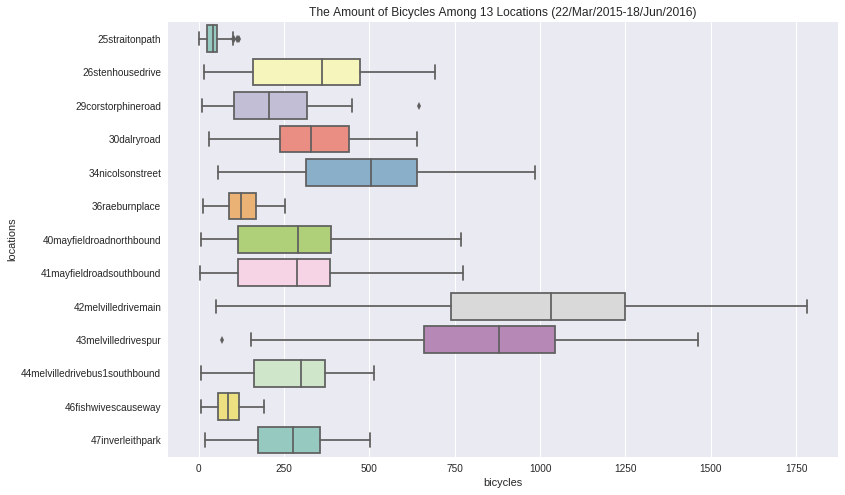

In [3]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate

print('''
We can see how busy the traffic is at a certain place from 22/Mar/2015 to 18/Jun/2016 (42melvilledrivemain is the busiest):

  - 1. 42melvilledrivemain
  - 2. 43melvilledrivespur
  - 3. 34nicolsonstreet
  - 4. 26stenhousedrive
  - 5. 30dalryroad
  - 6. 44melvilledrivebus1southbound
  - 7. 40mayfieldroadnorthbound
  - 8. 41mayfieldroadsouthbound
  - 9. 47inverleithpark
  - 10. 29corstorphineroad
  - 11. 36raeburnplace
  - 12. 46fishwivescauseway
  - 13. 25straitonpath

''');

# all these places have collected data during 22/Mar/2015 ~ 18/Jun/2016
filename = ['25straitonpath','26stenhousedrive','29corstorphineroad','30dalryroad','34nicolsonstreet',
            '36raeburnplace','40mayfieldroadnorthbound','41mayfieldroadsouthbound','42melvilledrivemain',
            '43melvilledrivespur','44melvilledrivebus1southbound','46fishwivescauseway','47inverleithpark']

# use variable 'data' to store the formatted and standardised dataframe
data = pd.DataFrame();
i = 0;

# loop in 13 csv files and use concat function to add all data use need in one file
for file_ in filename:
    df = pd.read_csv(file_+'_by_day.csv',index_col=None, header=0);
    #file_ = file_[:];
    if(i==0):
        df = df[['date','bicycle_day']];
        i+=1;
    else:
        df = df['bicycle_day'];
    data = pd.concat([data, df], axis=1, join='inner');
    data = data.rename(columns = {'bicycle_day':file_});

# use .T & stack() & reset_index() & drop ... to format our data and store it as a new file '13_locations_bicycles_comparison.csv'   

data.to_csv('timebike.csv', sep=',', header=True, index=False); # use for the following analysis
data = data.T;
data = data.iloc[1:];
data = data.stack();
data = data.reset_index();
data.drop('level_1', axis=1, inplace=True);
data.columns = ['locations', 'bicycles']
data.to_csv('13_locations_bicycles_comparison.csv', sep=',', header=True, index=True);

# use boxplot() to analyze the bicycles amount at different locations (22/Mar/2015 ~ 18/Jun/2016)
figs, axes = plt.subplots(1, 1, figsize=(12, 8), sharex=False);
axes = sns.boxplot( x="bicycles",y="locations", orient="h", data=data, palette="Set3", ax=axes);
axes.set_title('The Amount of Bicycles Among 13 Locations (22/Mar/2015-18/Jun/2016)');
#print(timebike)

### 1.3 Explore the outliers and the reasons of it

I found that data collected at 29corstorphineroad has an extreme max value:
    * Unnamed: 0           3383
    * counter_id             29
    * date           06/09/2015
    * channel_1               1
    * channel_2               0
    * bicycle_day           644


In [20]:
# Use kdxmax() to find the outlier of 29corstorphineroad and explore the reasons of it. Is it caused be a certain event? or some other reasons 
data = pd.read_csv('29corstorphineroad_by_day.csv');
row = data['bicycle_day'].idxmax();
print(data.iloc[row]);

Unnamed: 0           3383
counter_id             29
date           06/09/2015
channel_1               1
channel_2               0
bicycle_day           644
Name: 140, dtype: object


 
After searching online with the key words like '2015 Sep 6th' and 'bike', we found that there was an event happening right there then, which is just crossing the counter set at Corstorphine Road, namely, 29corstorphineroad.

Pedal for Scotland- Scotland’s Biggest Bike Event – 5th, 6th, 13th September 2015. We can find the following link for further information about what happened during that time:
http://www.dailyrecord.co.uk/lifestyle/health-fitness/pedal-scotland-scotlands-biggest-bike-6103718

According to my findings, bike events can also affect the amount of bikes significiantly, so we should pay much attention to it.


## 2. Bicycles & Weather

In general, people prefer to stay at home when weather is not good and vice versa.

Therefore, I downloaded the data from our university and relate it with our cycling data by time to analyze the relationship between them.
https://www.ed.ac.uk/geosciences/weather-station/weather-station-data

As I chose to compare the counters who have worked from 22/Mar/2015-18/Jun/2016, we use 'JCMB_2015.csv' and connect two datasets together.


### 2.1 Relate weather data to cycling data with time (22/Mar/2015 ~ 12/Oct/2015)

The format of these two kinds of data are not same, so I add some formatted columns as keys to connect them with each other.

Considering the fact that there is a large amount of data and I don't want to make my computer or jupyter crash, I use the weather data collected at 10:30 as an average weather data of a whole day. Thus, I will use fewer data and ignore a large amount of calculations to draw my conclusion and check my hypothesis.

But to be more accurate, we can use mean() to get the average data and see the relationship between weather and bicycles per hour.

By observation, I found there are many outliers in Edinburgh Cycling Data and that's why I use '42melvilledrivemain.csv' as an example, because this data is more reasonable according to my analysis and observation.

In [13]:
# read '42melvilledrivemain_by_day.csv' file and make the data a formatted one. Store it in 'data'
data = pd.read_csv("42melvilledrivemain_by_day.csv");
data['year'] = pd.DatetimeIndex(data['date']).year;
data['month'] = pd.DatetimeIndex(data['date']).month;
data['day'] = pd.DatetimeIndex(data['date']).day;
data['time'] =  data['year'].astype(str)+'/'+ data['month'].astype(str)+'/'+data['day'].astype(str);
data = data.reset_index();
data = data[['time','year','month','day','bicycle_day']];

# read 'JCMB_2015.csv' file and make the data a formatted one. Store it in 'weather'. Creat a new file in case of other analysis use.
weather = pd.read_csv("JCMB_2015.csv");
weather = weather[weather['date-time'].str.contains("10:30") == True];
weather['year'] = pd.DatetimeIndex(weather['date-time']).year;
weather['month'] = pd.DatetimeIndex(weather['date-time']).month;
weather['day'] = pd.DatetimeIndex(weather['date-time']).day;
weather['time'] =  weather['year'].astype(str)+'/'+ weather['month'].astype(str)+'/'+weather['day'].astype(str);
weather = weather.reset_index();
weather = weather[['time','year','month','day','atmospheric pressure (mBar)','rainfall (mm)',
                   'wind speed (m/s)','wind direction (degrees)','surface temperature (C)',
                   'relative humidity (%)','solar flux (Kw/m2)','battery (V)']];
weather.to_csv('JCMB_201_by_day.csv', sep=',', header=True, index=True);

# relate weather data to bicycle data and store it in weather_bicycle. Creat a new file in case of other analysis use.
weather_bicycle = pd.merge(data,weather,on=['time','year','month','day']);
weather_bicycle.to_csv('weather_bicycle.csv', sep=',', header=True, index=True);


### 2.2 Find the correlations between weather and bicycle

We guess that wind speed may have negative effects on bike amount, because it is much more harder for people to ride a bike on windy day. So, we assume that they may have a negative linear relationship with each other.

Use regplot to show the relationship between wind speed and amount of bicycles.



We guess that wind speed may have negative effects on bike amount, 
because it is much more harder for people to ride a bike on windy. 
So, we assume that they may have a negative linear relationship with each other. 

1. Linear Regression Chart 1
    *   rvaule = -0.23 -- Wind speed does have a weak negative relationship with the 
        amount of bicycles, as rvalue is between -0.3 and 0.
    *   pvalue = 0.001 -- We can accept our hypothesise as pvaule is less than 0.05.
    *   intercept = 1137 -- When wind speed is 0, bike amount is likely to be 1137.
2. Non-linear Regression Chart 2
    *   Based on the facts and chart we got, we can see that wind speed does have a
        negative relationship with bike amount.
    *   Use curve to do regression may make the result nonsense and useless, because, 
        in this case, the curve can't fit the data perfectly. For another, it is hard 
        to explain why it is this kind of curve rather than other kinds of curve. It 
        ma

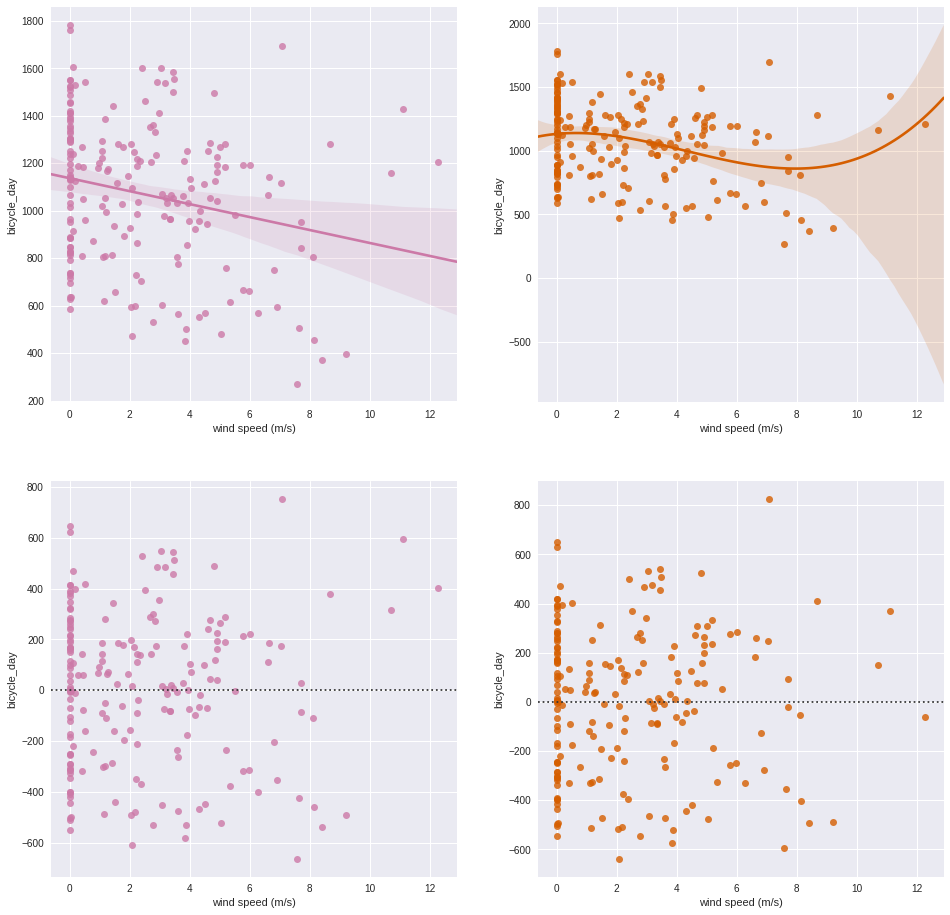

In [30]:
print('''
We guess that wind speed may have negative effects on bike amount, 
because it is much more harder for people to ride a bike on windy. 
So, we assume that they may have a negative linear relationship with each other. 

1. Linear Regression Chart 1
    *   rvaule = -0.23 -- Wind speed does have a weak negative relationship with the 
        amount of bicycles, as rvalue is between -0.3 and 0.
    *   pvalue = 0.001 -- We can accept our hypothesise as pvaule is less than 0.05.
    *   intercept = 1137 -- When wind speed is 0, bike amount is likely to be 1137.
2. Non-linear Regression Chart 2
    *   Based on the facts and chart we got, we can see that wind speed does have a
        negative relationship with bike amount.
    *   Use curve to do regression may make the result nonsense and useless, because, 
        in this case, the curve can't fit the data perfectly. For another, it is hard 
        to explain why it is this kind of curve rather than other kinds of curve. It 
        may be just accident.
3. Regression Chart 1&2
    *   The relationship between wind speed and bikes is weak, negative and not linear.
    *   human behaviour is really complicated and whether a person go out for cycling 
        depends on countless factors, such as wind speed, time, schedules, people's 
        emotions and etc. So, we can't assume wind speed has a simple linear relationship
        with bike amount.
    *   we use the wind speed at 10:30 to represent the whole day average wind speed.
        This can lead to residuals. But we can fix it by modifying our model a little, 
        if jupyter is stable enough and we have a high-performanced computer.
4. Residuals Chart 3&4 - the residuals for the regression chart above.
    *   The variance has been explained not so good.
    *   There is no obvious structure left over and the data seems like a random one.
   
''');

print(stats.linregress(weather_bicycle['wind speed (m/s)'],weather_bicycle['bicycle_day']));


sns.set(style="darkgrid", palette="colorblind", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(16, 16))
sns.regplot(x="wind speed (m/s)", y="bicycle_day", data=weather_bicycle, order=1, color="m", ax=axes[0,0])
sns.regplot(x="wind speed (m/s)", y="bicycle_day", data=weather_bicycle, order=3, color="r", ax=axes[0,1])
sns.residplot(x="wind speed (m/s)", y="bicycle_day", data=weather_bicycle, order=1, color="m", ax=axes[1,0])
sns.residplot(x="wind speed (m/s)", y="bicycle_day", data=weather_bicycle, order=3, color="r", ax=axes[1,1])


## 3. Bicycles & Date

In general, people who ride bikes a lot may have a daily routine, such as they choose to go out for biking on a certain weekday or they prefer not to go out for biking on important festivals.

Therefore, I tried to analyze how does the time affect people on biking behaviour and is there a pattern in their behaviour.


### 3.1 Gain insights of how time affect the amount of bikes

I tried to plot all the data collected by all 13 counters (the chart is a mess with 13 counters' data, so I use two counters instead to make my point clear)

By visualizing the relationship between the amount of bikes and time, we can see clearly that the date has a significiant influence on the amount of bikes. Although data from two counters are totally different, all of them share similar trends. 

They tend to increase and decrease at the same time. Even hit bottom at the same time.


We would like to explore whether there is a relationship between 
the amount of bikes and the date. Therefore, we use data visualization
to gain insights on this issue.

1. As we can see, they all change regularly in a week. It means people
ride bikes regularly in a week. It may be affected by their daily routine,
such as going to work and exercising.
2. All data collected by counters hit the bottom around Dec. 26, 2015. It 
could by explained as the fact that people don't like going out by bike on 
Christmas.
3. The data around August, 2015 is weird, because there is no ups and downs
for several weeks. I guess it might be caused by the update of the counters
or some techinical problems, otherwise, the steady increase can't be explained.




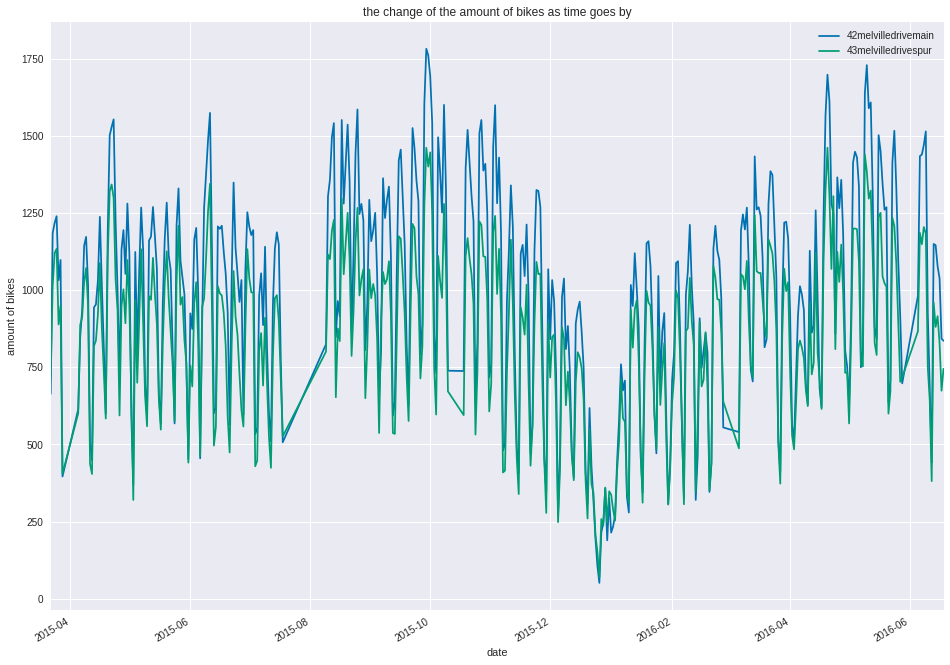

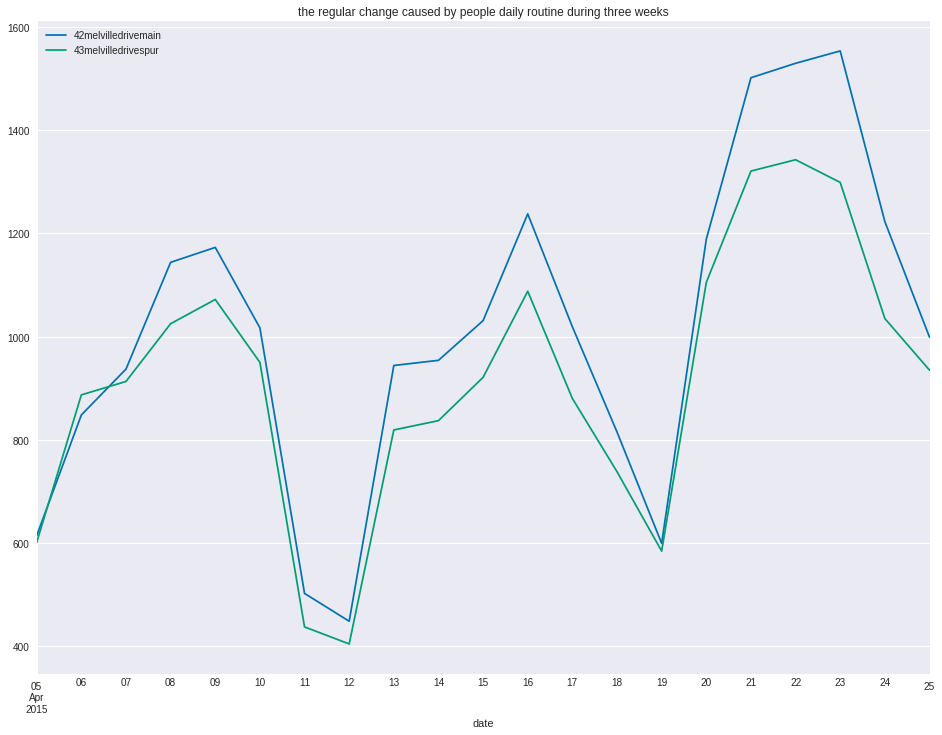

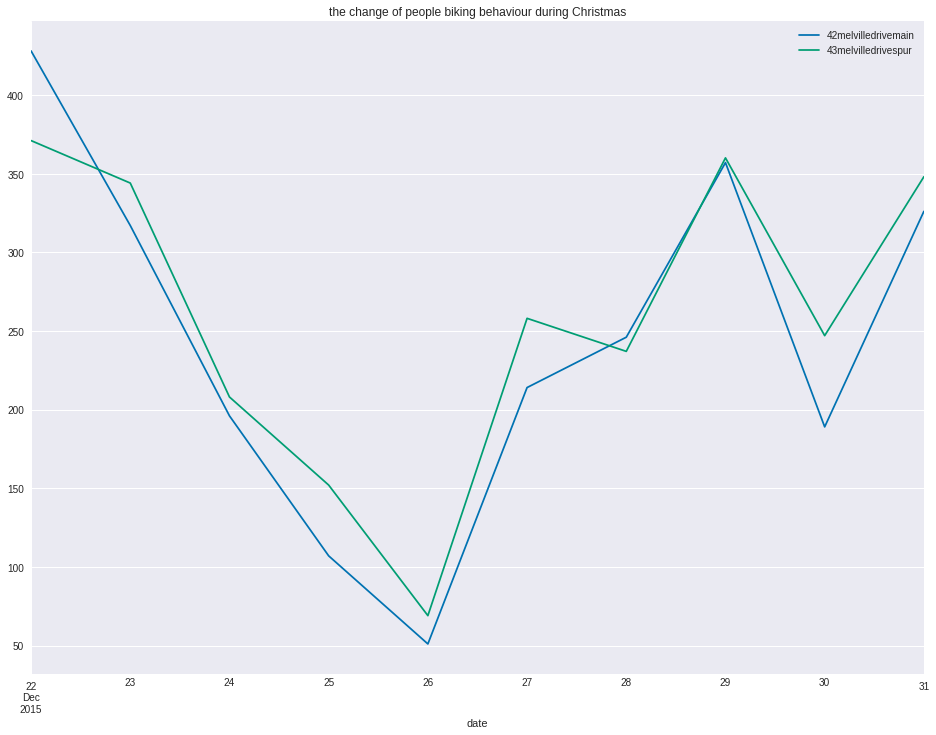

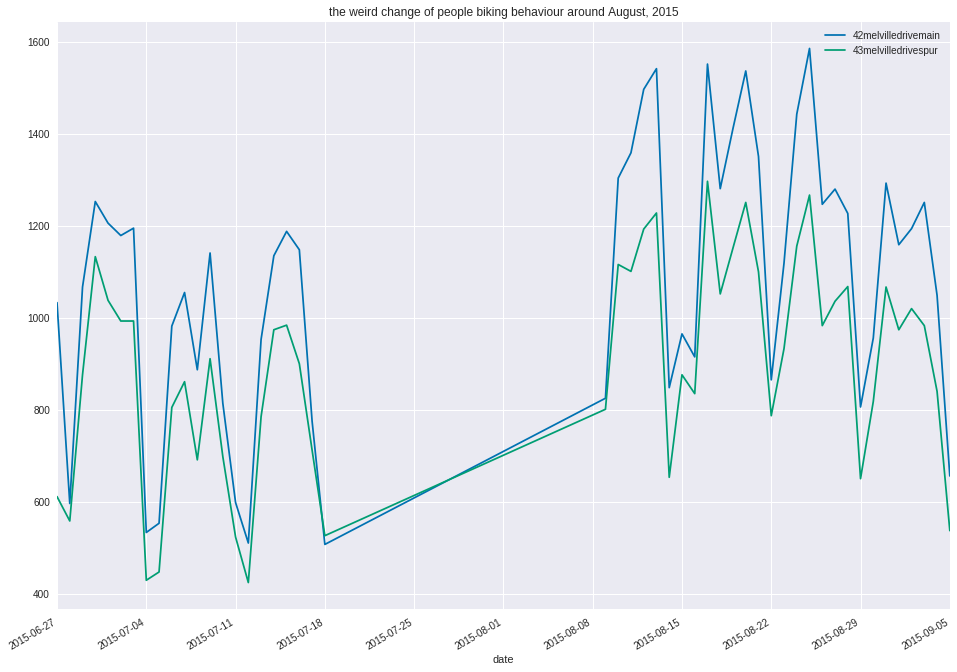

In [25]:
print('''
We use data visualization to gain insights on this issue.

1. As we can see, they all change regularly in a week. It means people
ride bikes regularly in a week. It may be affected by their daily routine,
such as going to work and exercising.
2. All data collected by counters hit the bottom around Dec. 26, 2015. It 
could by explained as the fact that people don't like going out by bike on 
Christmas.
3. The data around August, 2015 is weird, because there is no ups and downs
for several weeks. I guess it might be caused by the update of the counters
or some techinical problems, otherwise, the steady increase can't be explained.

''');
# read 'timebike.csv' file and store it in 'data'
data = pd.read_csv("timebike.csv");
data = data[['date','42melvilledrivemain','43melvilledrivespur']]
# transfer the date as the index column and plot two counters data out.
data.date = pd.to_datetime(data['date'], format='%d/%m/%Y')
data.set_index(['date'],inplace=True)
# see the change of the amount of bikes as time goes by
ax = data.plot(figsize=(16, 12),title='the change of the amount of bikes as time goes by')
ax.set_ylabel("amount of bikes")

# see the regular change caused by people daily routine during three weeks
data1 = data[7:28]
data1.plot(figsize=(16, 12),title='the regular change caused by people daily routine during three weeks')


# see the change of people biking behaviour during Christmas
data2 = data[240:250]
data2.plot(figsize=(16, 12),title='the change of people biking behaviour during Christmas')


# see the weird change of people biking behaviour around August, 2015
data3 = data[90:140]
data3.plot(figsize=(16, 12),title='the weird change of people biking behaviour around August, 2015')




## 4 Bicycles & Day of Week

Based on the findings above, I would like to deeper my exploration about bicycles and time to see on which day of week, people prefer to go out for biking.


### 3.1 Turn date data into the day of week

I use to_datetime() to transfer the string date variable into a date one, and then turn it into the day of week data.

After that, we can get the confidence intervals for each day of week and compare them together to see whether there is a certain pattern for people who ride bikes.



We can know interesting information from the chart:

1. People prefer to go out for biking on weekday rather than weekends, 
even we take confidence intervals into consideration
2. We can infer that people like going to school or work by bike, because 
they show little interests in bicycles on weekends, when they don't need
to go for work or school.
3. Although people ride bikes on weekday, Friday is not that popular. The 
possible reasons may be like people prefer to have a drink, go for a date,
go to cinema and other entertainments. In that case, public transportation,
taxi or walking may be more convient, thus resulting in low amount of bikes.



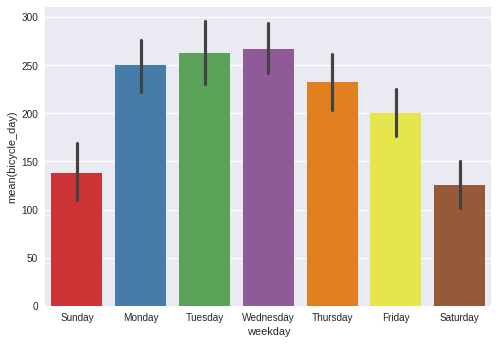

In [29]:
print('''
We can know interesting information from the chart:

1. People prefer to go out for biking on weekday rather than weekends, 
even we take confidence intervals into consideration
2. We can infer that people like going to school or work by bike, because 
they show little interests in bicycles on weekends, when they don't need
to go for work or school.
3. Although people ride bikes on weekday, Friday is not that popular. The 
possible reasons may be like people prefer to have a drink, go for a date,
go to cinema and other entertainments. In that case, public transportation,
taxi or walking may be more convient, thus resulting in low amount of bikes.
''');

data = pd.read_csv('29corstorphineroad_by_day.csv');

data['date'] = pd.to_datetime(data['date']);
data['weekday'] = data['date'];
data['weekday'] = data['date'].dt.weekday_name
data = data[['weekday','bicycle_day']]
tips = sns.load_dataset("tips")
ax = sns.barplot(x="weekday", y="bicycle_day", data=data, palette="Set1")

# Reflection & Hypothesise

## 1. Relection:

 As our group aimed at exploring people biking behaviour, I found human behaviour is complicated and related to many other variables in real world, such as locations, weather, date, day of week and etc. Therefore, we can combine all the data together to simulate and draw conclusions. This kind of combination is valuable. It may give us insights we’ve never thought before.

Even though our hypotheses seem so reasonable, like wind speed has negative effect on people biking behaviour, we still need to check and test them, because, sometimes, they may fail to fit in real world or not fit in the real world in the way we thought. Real world is so complex and data can help us to be more rigorous by testing what we are not sure about.

However, data is only one aspect to figure out what happened and gain insights about what may happen next. For example, the outliers I found are something data can’t tell me the reason why they exist. I have to combine online news, websites and other information to figure out what happened and resulted in the outliers, in that way, to clean data and develop a better understanding of data in a complicated context.



## 2. Hypotheses:

1. wind speed will affect people biking behaviour
    - by visualize these two variables, I can see a weak negative non-linear relationship between them
    - I can test it by involving more data in this context to check and find several representitive data points to check them individually
2. festivals will affect people biking behaviour
    - graph shows that the amount of bikes hit bottom on 26 Dec., 2015 for all counters. There must be a reason and I think Christmas makes this phenomenon reasonable
    - I can test it by checking the data collected in other years to see whether Christmas has a constant effect or not.
3. day of week will affect people biking behaviour
    - graph shows that people ride bikes more often on weekday rather than weekends. It may be that they go to work by bike.
    - add camera for each counter and check whether the same person ride bikes and pass by at a certain time during around 9am and 5pm. If camera is not available, I will test it by check the amount of bikes by hour to define a ceratin period of time as a person's going to work time. In that way, seperate the work guys from others who ride bikes.
4. bike events will affect people biking behaviour
    - counter set at Corstorphine Road got a outlier on 6th Sep, 2015, during which day, the amount of bikes increased significantly. I found it was because there was a Pedal for Scotland- Scotland’s Biggest Bike Event during that day, whose route pass the counter, thus resulting in a outlier.
    - I can test it by asking for people who was responsible for the event and data collection work during that time.
5. counters may suffer technical problems aroud August 2015
    - According to our whole year data, the amount of bikes change regularly during every week. However, there was no changes but steady increases around August, 2015. It can't be caused by bike events or weather. Every counter's data changed suddenly and I believe something must have happened during that time. As far as I can see, one reasonable reason may be that the counters suffered technical problems during that time.
    - I can test it by asking for people who was responsible for data collection work during that time.
